# Boston 주택 가격 예측 모델

In [32]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [33]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


- 데이터셋의 feature에 대한 설명

    - CRIM: 자치시별 1인당 범죄율
    - ZN: 25,000 평방피트를 초과하는 거주지역의 비율
    - INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
    - CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
    - NOX: 10ppm 당 농축 일산화질소
    - RM: 주택 1 가구당 평균 방의 개수
    - AGE: 1940년 이전에 건축된 소유주택의 비율
    - DIS: 5개의 보스턴 직업센터까지의 접근성 지수
    - RAD: 방사형 도로까지의 접근성 지수
    - TAX: 10,000 달러당 재산세율
    - PTRATIO:자치시(town)별 학생/교사 비율
    - B: 1000(BK-0.63)^2 여기서Bk는 자치시별 흑인의 비율을 말함
    - LSTAT: 모집단의 하위계층의 비율(%)
    - MEDV: 본인 소유의 주택가격(중앙값)(단위: $1,000)

In [34]:
print(train_data)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [35]:
from sklearn.model_selection import train_test_split
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
train_data = train_data - (train_data.mean(axis=0))

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = train_data/(train_data.std(axis=0))
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - (test_data.mean(axis=0))
test_data = test_data/(test_data.std(axis=0))
# 훈련 데이터와 검증 데이터로 나누기
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.3, random_state=123)

In [41]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 주택 가격 예측을 위한 딥러닝 모델 구성
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))

# 추가 은닉층
model.add(Dense(64, activation='relu'))

# 출력층 - 회귀를 위한 출력층이므로 activation 함수 없음
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약 출력
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val)
                    )

Epoch 1/30
9/9 [==============================] - 0s 7ms/step - loss: 5.1610 - mae: 1.5983 - val_loss: 8.9394 - val_mae: 2.2878
Epoch 2/30
9/9 [==============================] - 0s 4ms/step - loss: 5.2255 - mae: 1.6403 - val_loss: 9.0079 - val_mae: 2.3027
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 5.0480 - mae: 1.5949 - val_loss: 9.0292 - val_mae: 2.3151
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 5.0450 - mae: 1.5961 - val_loss: 8.9384 - val_mae: 2.2936
Epoch 5/30
9/9 [==============================] - 0s 4ms/step - loss: 5.0012 - mae: 1.5819 - val_loss: 8.9824 - val_mae: 2.3062
Epoch 6/30
9/9 [==============================] - 0s 4ms/step - loss: 5.0043 - mae: 1.5944 - val_loss: 9.0841 - val_mae: 2.3101
Epoch 7/30
9/9 [==============================] - 0s 4ms/step - loss: 5.0333 - mae: 1.5873 - val_loss: 8.8092 - val_mae: 2.2824
Epoch 8/30
9/9 [==============================] - 0s 4ms/step - loss: 4.8501 - mae: 1.5718 - val_loss: 9

In [224]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
# plt.style.use('seaborn-white')

# history_dict = history.history

# loss = history_dict['loss']
# val_loss = history_dict['val_loss']

# epochs = range(1, len(loss) + 1)
# fig = plt.figure(figsize=(12, 5))

# ax1 = fig.add_subplot(1, 2, 1)
# ax1.plot(epochs, loss, 'b-', label='train_loss')
# ax1.plot(epochs, val_loss, 'r-', label='val_loss')
# ax1.set_title('Train and Validation Loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.grid()
# ax1.legend()

# mae = history_dict['mae']
# val_mae = history_dict['val_mae']

# ax2 = fig.add_subplot(1, 2, 2)
# ax2.plot(epochs, mae, 'b-', label='train_mae')
# ax2.plot(epochs, val_mae, 'r-', label='val_mae')
# ax2.set_title('Train and Validation MAE')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Accuracy')
# ax2.grid()
# ax2.legend()

# plt.show()

- 시각화 과정을 코랩에서 돌린 관계로 시각화 결과 값을 첨부
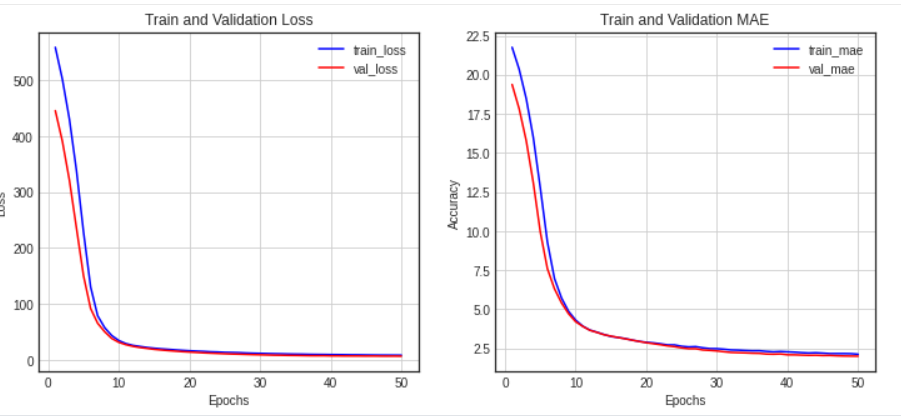

In [51]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 16.7768 - mae: 2.6917


[16.776798248291016, 2.69167423248291]

### 평가
- 앞에서 실습했던 내용중에 성능을 올리기 위해 배웠던 것들을 적용했지만, 기존의 코드가 더 결과값이 좋아서 기존의 코드로 진행했다.
- 적절히 epoch와 배치 사이즈를 조정하면서 해보니 loss: 16.7768 - mae: 2.6917값으로 가장 좋은 결과값을 도출했다.
- 아래에 코드는 배치 정규화와 드롭아웃 얼리스탑핑 등을 적용하였지만 mae가 3정도가 최대로 위의 코드보다 좋지 않은 결과값을 가져왔다.
- 데이터 수가 그리 많지 않아서 은닉층과 과적합을 위해 많은 기법을 하는 것이 그리 좋지 않은 것 같다.

In [52]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import layers, models

# 주택 가격 예측을 위한 딥러닝 모델 구성
# model = Sequential()
# model.add(layers.Input(shape=(train_data.shape[1],)))  # 입력층
# model.add(layers.Dense(64, use_bias=False))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))

# 추가 은닉층
# model.add(layers.Dense(64, use_bias=False))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.3))

# 출력층 - 회귀를 위한 출력층이므로 activation 함수 없음
# model.add(layers.Dense(1))

# 모델 컴파일
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 요약 출력
# model.summary()

# ModelCheckpoint 콜백 설정
# check_point_cb = ModelCheckpoint('boston_housing_model.keras', save_best_only=True)

# EarlyStopping 콜백 설정 (선택사항)
# early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reuters 딥러닝 모델 

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [180]:
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.25, random_state=123)

# 데이터셋의 샘플 수 출력
print("훈련 데이터 수:", len(x_train))
print("검증 데이터 수:", len(x_val))
print("테스트 데이터 수:", len(test_data))
print("클래스 수:", len(set(train_labels)))

훈련 데이터 수: 6736
검증 데이터 수: 2246
테스트 데이터 수: 2246
클래스 수: 46


In [181]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(y_val) #검증 데이터도 변환
y_test = utils.to_categorical(test_labels)

In [182]:
import tensorflow as tf
from tensorflow.keras import models, layers

# 모델 정의
model = models.Sequential()

# 입력층 및 첫 번째 은닉층
model.add(layers.Dense(512, use_bias=False, input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))  # ELU 활성화 함수 사용
model.add(layers.Dropout(0.5))  # Dropout 추가

# 추가 은닉층
model.add(layers.Dense(512, use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))  # ELU 활성화 함수 사용
model.add(layers.Dropout(0.5))  # Dropout 추가

# 출력층
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()




Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 512)               5120000   
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
activation_40 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 512)               262144    
_________________________________________________________________
batch_normalization_41 (Batc (None, 512)               2048      
_________________________________________________________________
activation_41 (Activation)   (None, 512)             

In [183]:
# 콜백 함수 설정
checkpoint_cb = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss', mode='min')

In [184]:
# 모델 훈련
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/40
18/18 [==============================] - 1s 38ms/step - loss: 1.9732 - accuracy: 0.6103 - val_loss: 1.8853 - val_accuracy: 0.8326
Epoch 2/40
18/18 [==============================] - 0s 15ms/step - loss: 0.7892 - accuracy: 0.8347 - val_loss: 1.6027 - val_accuracy: 0.9065
Epoch 3/40
18/18 [==============================] - 0s 16ms/step - loss: 0.4636 - accuracy: 0.8975 - val_loss: 1.2640 - val_accuracy: 0.9390
Epoch 4/40
18/18 [==============================] - 0s 16ms/step - loss: 0.3095 - accuracy: 0.9322 - val_loss: 0.9924 - val_accuracy: 0.9537
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.2419 - accuracy: 0.9392 - val_loss: 0.7183 - val_accuracy: 0.9626
Epoch 6/40
18/18 [==============================] - 0s 17ms/step - loss: 0.1980 - accuracy: 0.9497 - val_loss: 0.5808 - val_accuracy: 0.9608
Epoch 7/40
18/18 [==============================] - 0s 15ms/step - loss: 0.1830 - accuracy: 0.9544 - val_loss: 0.4375 - val_accuracy: 0.9617
Epoch 8/40
18

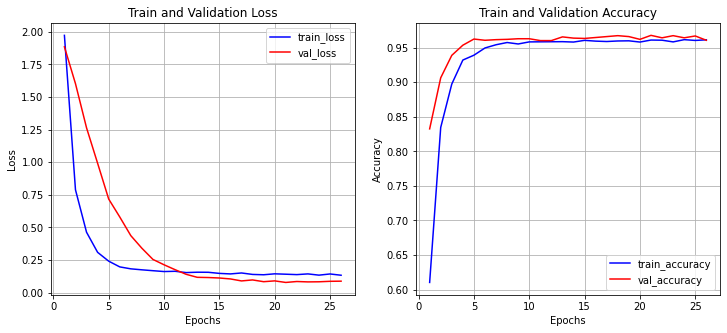

In [186]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [187]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.8152


[1.091515302658081, 0.8152270913124084]

### 평가

- 10000개의 데이터 셋을 가지고 학습을 하는 것이기 때문에 배치 정규화와 드랍아웃을 다 사용했고 (0.5)정도 해도 괜찮을 것 같았다.

- 앞의 보스턴 집값 모델은 데이터의 개수가 작았기 때문에 드랍아웃을 0.3으로 하여 많은 소실이 일어나지 않게 하였다.(둘의 비교를 설명하기 위해서 여기에 기술)

- 옵티마이저로 adam 과 rmsdrop을 모두 사용했고, relu 대신 elu를 활성화 함수로 사용했다.

- 기존의 실습 때는 따로 검증 데이터 분리를 하지 않아서 검증 데이터에 대한 원핫인코딩을 처음에 하지 않아서 결과값이 더 좋지 않았다.

- y_val = utils.to_categorical(y_val)를 통해서 보완 후 진행

- 이러한 과정을 거쳐서 rmsdrop과 adam을 모두 돌려보고, dense와 epoch도 수정해가면서 뽑아봤는데 0.8152라는 결과값을 얻었다.

- 앞선 과정에선 70%대의 정확률을 보이면서 점차 개선해나갔고, 실습때는 layer을 128정도로 했던 게 결과값이 잘나왔던거 같은데, 배치 정규화와 드롭아웃과 같은 것을 다 고려해가면서 조금씩 올려서 했다.(128,256,512 모두 시도)

- epoch 또한 (40~100) 정도 까지 해봤는데, 높다고 무조건 좋은게 아니며, 시각화 그래프 상에서도 그렇고 , 조기 종료가 되는 시도가 많아서, 40으로 결정했다.

# CIFAR10 딥러닝 모델

In [225]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [226]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [227]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

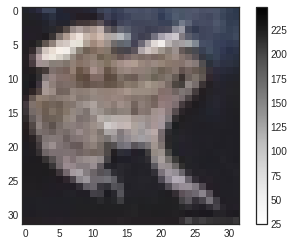

In [228]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [229]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [230]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# 훈련 데이터 변형
x_train = x_train.reshape(x_train.shape[0], -1)

# 검증 데이터 변형
x_val = x_val.reshape(x_val.shape[0], -1)

# 테스트 데이터 변형
x_test = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [231]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [232]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

model = Sequential([
    Dense(2048, activation='relu', input_shape=(3072,)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_60 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_60 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_95 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_61 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_61 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_96 (Dense)             (None, 512)             

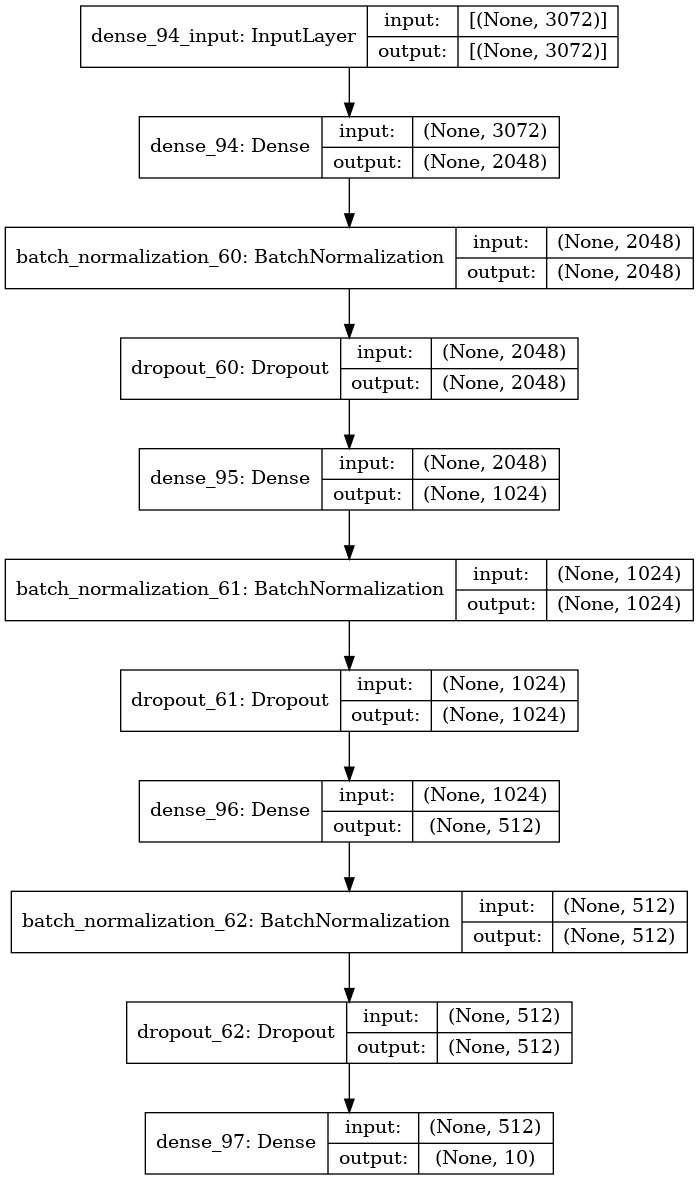

In [233]:
utils.plot_model(model, show_shapes=True)

In [234]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 설정
checkpoint = ModelCheckpoint('best_model.h5',  # 모델을 저장할 파일 이름
                             save_best_only=True,  # 가장 좋은 성능의 모델만 저장
                             monitor='val_accuracy',  # 검증 정확도를 기준으로 모델 성능 평가
                             mode='max',  # 정확도는 높을수록 좋으므로 'max' 모드 사용
                             verbose=1)

# EarlyStopping 설정
early_stopping = EarlyStopping(monitor='val_loss',  # 검증 손실을 모니터링
                               patience=10,  # 10 에폭 동안 개선이 없으면 학습 중단
                               restore_best_weights=True,  # 가장 좋은 가중치 복원
                               verbose=1)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=100,  # 최대 100 에폭
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint, early_stopping],
                    verbose=1)

Epoch 1/100
625/625 [==============================] - 4s 5ms/step - loss: 2.0474 - accuracy: 0.3101 - val_loss: 1.8151 - val_accuracy: 0.3547

Epoch 00001: val_accuracy improved from -inf to 0.35470, saving model to best_model.h5
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7449 - accuracy: 0.3832 - val_loss: 1.8614 - val_accuracy: 0.3443

Epoch 00002: val_accuracy did not improve from 0.35470
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6516 - accuracy: 0.4114 - val_loss: 1.8672 - val_accuracy: 0.3459

Epoch 00003: val_accuracy did not improve from 0.35470
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6165 - accuracy: 0.4216 - val_loss: 1.6497 - val_accuracy: 0.4127

Epoch 00004: val_accuracy improved from 0.35470 to 0.41270, saving model to best_model.h5
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5798 - accuracy: 0.4351 - val_loss: 1.7269 - val_accuracy: 0

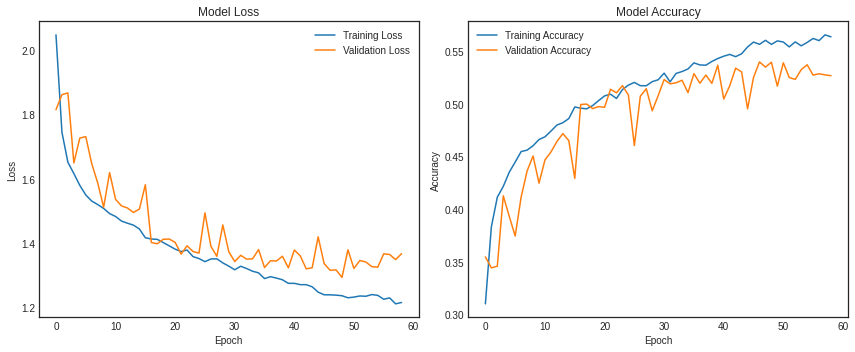

In [235]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 손실(loss) 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 정확도(accuracy) 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

In [236]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2951 - accuracy: 0.5384


[1.295135259628296, 0.5383999943733215]

### 평가

- 처음에 파라미터 설정을 할때에는 512,256,128,64 이렇게 네번을 하였는데 결과값이 0.47때였다. (epoch 50, batch size 64)

- 노드의 동영상의 구조를 보고 설정을 다시해서 2048,1024,512로 해서 0.51이 떴다.(epoch 50, batch size 128)

- 추가로 2048,1024,512,256,128,64 까지 층을 더 만들어서 했는데 0.52정도 떴다,(epoch 50, batch size 64)

- 이것 저것 시도하다가 성능이 많이 개선되지는 않아서, 위와 같이 (dense 2048,1024,512 , epoch 100, batch size 64)로 하여 가장 좋은 결과값인 0.5384가 나왔다.

- 예시를 보니까 epoch가 거의 800까지 간 것으로 시각화가 되어있어서, 얼리스탑핑을 하지 않았구나 생각을 했다.

- loss와 accuracy가 일정한 추세를 그리지 않고 불규칙적인 나의 모델과 달리 예시에서는 원만하게 연속적인 그래프가 그려져 있어서 epoch를 높여서 조기종료를 시키지 않고 모델을 잘 설정을 하면 저렇게 나오는 건가 하는 생각이 들었다. 

- 2번의 문제는 loss를 최소화하는 min을 통해서 조기종료와 체크포인트를 설정했는데 3번에서는 accuracy가 최대화 하는 것이 좋기 때문에 max로 설정해야하는 구나를 깨달았다. 